In [1]:
import torch
from torchvision import datasets
from PIL import Image
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

data_path = '/content/gdrive/MyDrive/data-unversioned/p1ch7'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Mounted at /content/gdrive


100%|██████████| 170498071/170498071 [00:01<00:00, 105062162.97it/s]


Extracting /content/gdrive/MyDrive/data-unversioned/p1ch7/cifar-10-python.tar.gz to /content/gdrive/MyDrive/data-unversioned/p1ch7
Files already downloaded and verified


In [2]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [3]:
len(cifar10)

50000

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

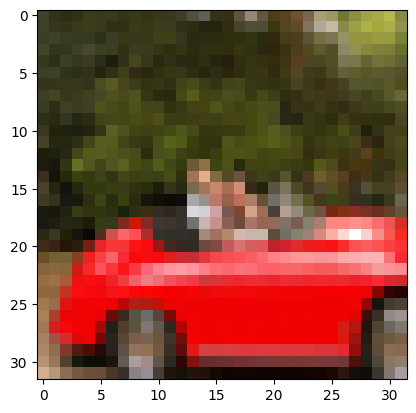

In [6]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

In [7]:
from torchvision import transforms

dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [8]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [9]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [10]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [11]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

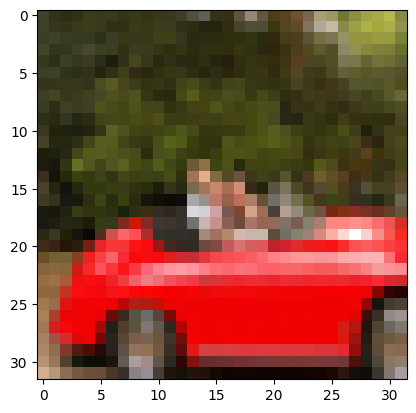

In [12]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [13]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [14]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [15]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [16]:
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

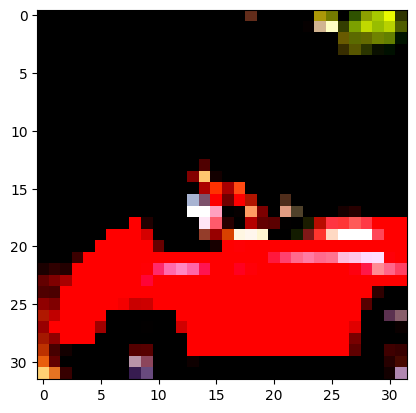

In [17]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                          (0.2470, 0.2435, 0.2616))
    ]))

img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [29]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]


In [18]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
    nn.Linear(
        3072,
        512
    ),
    nn.Tanh(),
    nn.Linear(
        512,
        n_out
    )
)

In [19]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])

softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [20]:
softmax(x).sum()

tensor(1.)

In [32]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']



data_path = '/content/gdrive/MyDrive/data-unversioned/p1ch7'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))


cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

Mounted at /content/gdrive
Files already downloaded and verified
Files already downloaded and verified


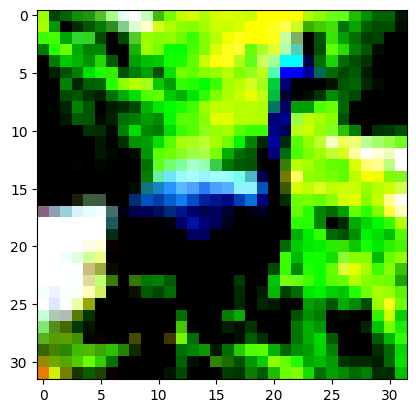

In [34]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
)

img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [35]:
img_batch = img.view(-1).unsqueeze(0)

out = model(img_batch)
out

tensor([[0.4784, 0.5216]], grad_fn=<SoftmaxBackward0>)

In [37]:
_, index = torch.max(out, dim=1)

index

tensor([1])

In [45]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

loss = nn.NLLLoss()

img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.8193, grad_fn=<NllLossBackward0>)

In [46]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
  for img, label in cifar2:
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_fn(out, torch.tensor([label]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print('Epoch: %d, Loss %f' % (epoch, loss))

Epoch: 0, Loss 6.547140


KeyboardInterrupt: ignored

In [47]:
img.shape

torch.Size([3, 32, 32])

In [48]:
img.view(-1).shape

torch.Size([3072])

In [49]:
img.view(-1).unsqueeze(0).shape

torch.Size([1, 3072])

In [52]:
import torch
import torch.nn as nn


train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
  for imgs, labels in train_loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size, -1))
    loss = loss_fn(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print('Epoch: %d, Loss %f' % (epoch, loss))

Epoch: 0, Loss 0.600637
Epoch: 1, Loss 0.278855
Epoch: 2, Loss 0.512752
Epoch: 3, Loss 0.528238
Epoch: 4, Loss 0.341616
Epoch: 5, Loss 0.438355
Epoch: 6, Loss 0.252312
Epoch: 7, Loss 0.528678
Epoch: 8, Loss 0.548017
Epoch: 9, Loss 0.416890
Epoch: 10, Loss 0.366460
Epoch: 11, Loss 0.402339
Epoch: 12, Loss 0.274747
Epoch: 13, Loss 0.479280
Epoch: 14, Loss 0.715443
Epoch: 15, Loss 0.597097
Epoch: 16, Loss 0.602899
Epoch: 17, Loss 0.265619
Epoch: 18, Loss 0.236143
Epoch: 19, Loss 0.373340
Epoch: 20, Loss 0.227608
Epoch: 21, Loss 0.173548
Epoch: 22, Loss 0.333812
Epoch: 23, Loss 0.143203
Epoch: 24, Loss 0.425698
Epoch: 25, Loss 0.214733
Epoch: 26, Loss 0.132254
Epoch: 27, Loss 0.143121
Epoch: 28, Loss 0.129968
Epoch: 29, Loss 0.066267
Epoch: 30, Loss 0.225961
Epoch: 31, Loss 0.224365
Epoch: 32, Loss 0.218637
Epoch: 33, Loss 0.395979
Epoch: 34, Loss 0.169657
Epoch: 35, Loss 0.099020
Epoch: 36, Loss 0.228849
Epoch: 37, Loss 0.115137
Epoch: 38, Loss 0.127732
Epoch: 39, Loss 0.125956
Epoch: 40,

In [53]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size, -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())

print(f'Accuracy: {float(correct / total)}')

Accuracy: 0.8125


In [57]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.746048
Epoch: 1, Loss: 0.357327
Epoch: 2, Loss: 0.461386
Epoch: 3, Loss: 0.428829
Epoch: 4, Loss: 0.641298
Epoch: 5, Loss: 0.504110
Epoch: 6, Loss: 0.386720
Epoch: 7, Loss: 0.234108
Epoch: 8, Loss: 0.480020
Epoch: 9, Loss: 0.707106
Epoch: 10, Loss: 0.414391
Epoch: 11, Loss: 0.650100
Epoch: 12, Loss: 0.365663
Epoch: 13, Loss: 0.209152
Epoch: 14, Loss: 0.430524
Epoch: 15, Loss: 0.333542
Epoch: 16, Loss: 0.278697
Epoch: 17, Loss: 0.589524
Epoch: 18, Loss: 0.413271
Epoch: 19, Loss: 0.497926
Epoch: 20, Loss: 0.546096
Epoch: 21, Loss: 0.184157
Epoch: 22, Loss: 0.176099
Epoch: 23, Loss: 0.246405
Epoch: 24, Loss: 0.521077
Epoch: 25, Loss: 0.272521
Epoch: 26, Loss: 0.228483
Epoch: 27, Loss: 0.354090
Epoch: 28, Loss: 0.272695
Epoch: 29, Loss: 0.205499
Epoch: 30, Loss: 0.118700
Epoch: 31, Loss: 0.173578
Epoch: 32, Loss: 0.280348
Epoch: 33, Loss: 0.188747
Epoch: 34, Loss: 0.161513
Epoch: 35, Loss: 0.044559
Epoch: 36, Loss: 0.395052
Epoch: 37, Loss: 0.335640
Epoch: 38, Loss: 0.211

In [58]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size, -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())

print(f'Accuracy: {float(correct / total)}')

Accuracy: 0.811
